# Hands-on Lab: Build an Interactive Dashboard with Plotly Dash

In this lab, building a Plotly Dash application for users to perform interactive visual analytics on SpaceX launch data in
real-time.

This dashboard application contains input components such as a dropdown list and a range slider to
interact with a pie chart and a scatter point chart.  guided to build this dashboard application via the following tasks:

*   TASK 1: Add a Launch Site Drop-down Input Component
*   TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown
*   TASK 3: Add a Range Slider to Select Payload
*   TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot

Completed dashboard application should look like the following screenshot:

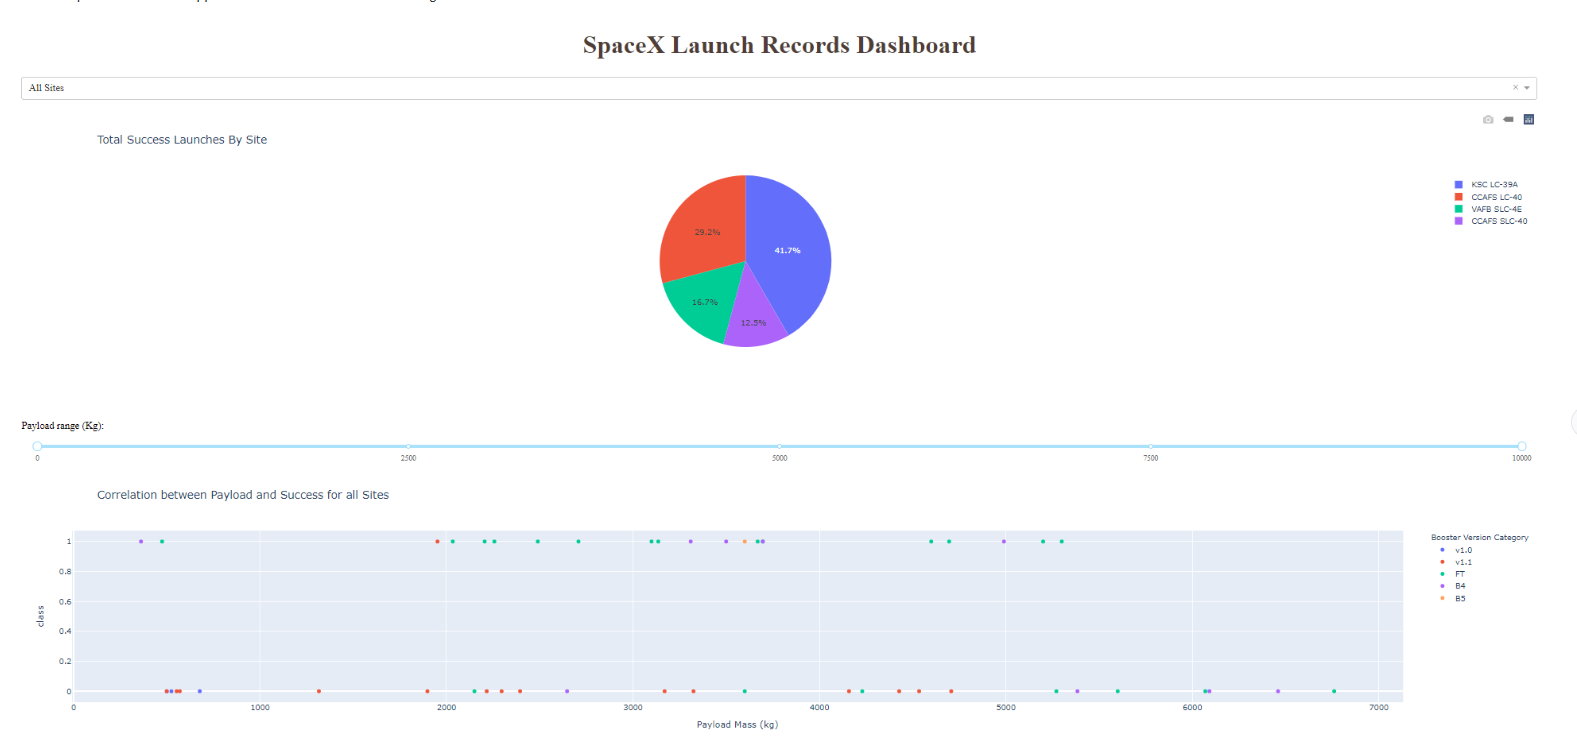

After visual analysis using the dashboard, able to obtain some insights to answer the following five questions:
1. Which site has the largest successful launches?
2. Which site has the highest launch success rate?
3. Which payload range(s) has the highest launch success rate?
4. Which payload range(s) has the lowest launch success rate?
5. Which F9 Booster version (v1.0, v1.1, FT, B4, B5, etc.) has the highest
launch success rate?

## Setup development environment

### Install required Python packages

Open a new terminal, by clicking on the menu bar and selecting Terminal->New Terminal, as in the image below

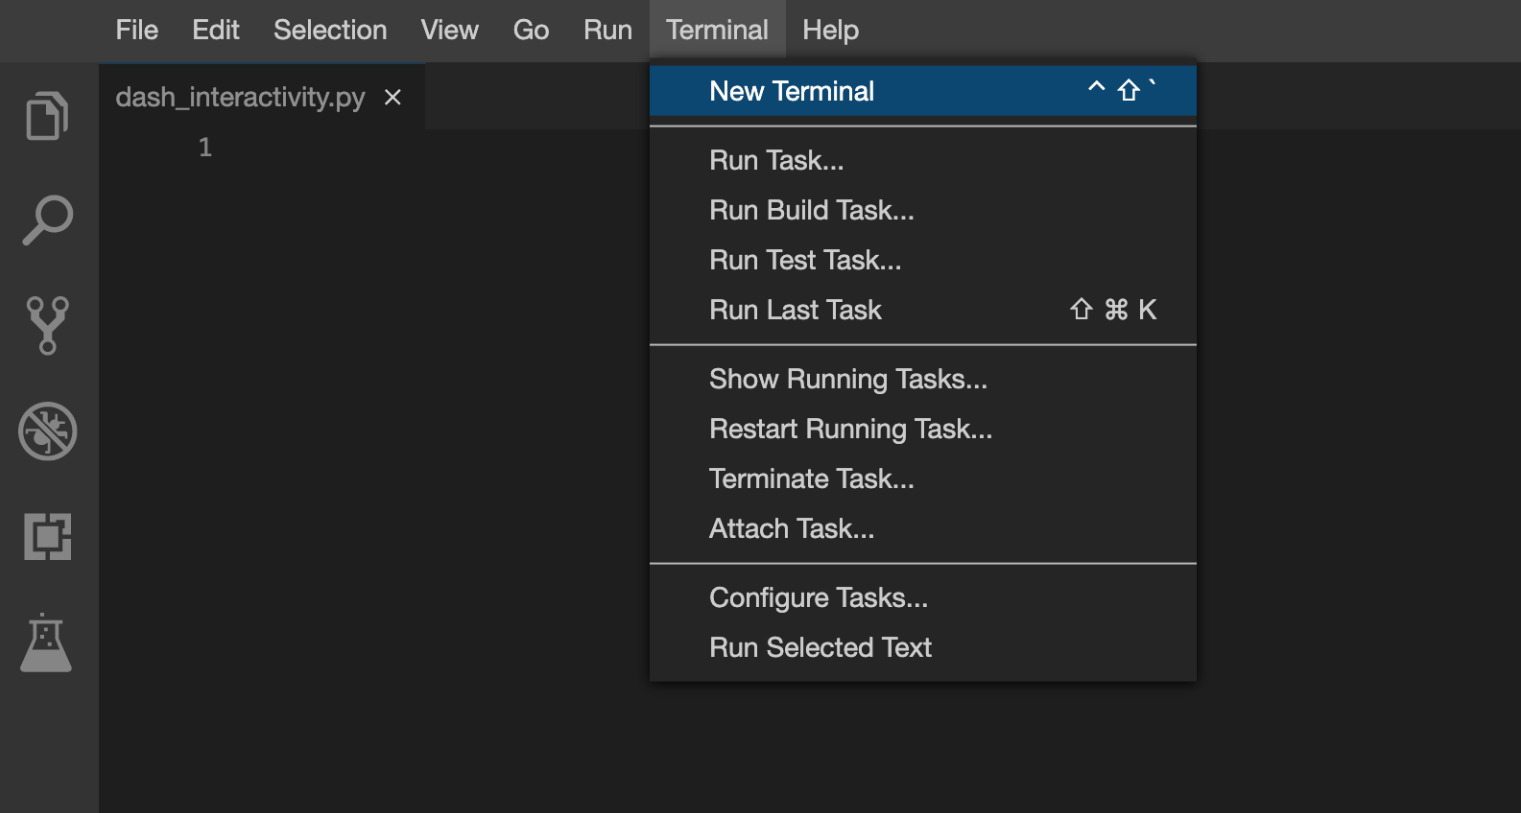

Now, script and terminal ready to start the lab.

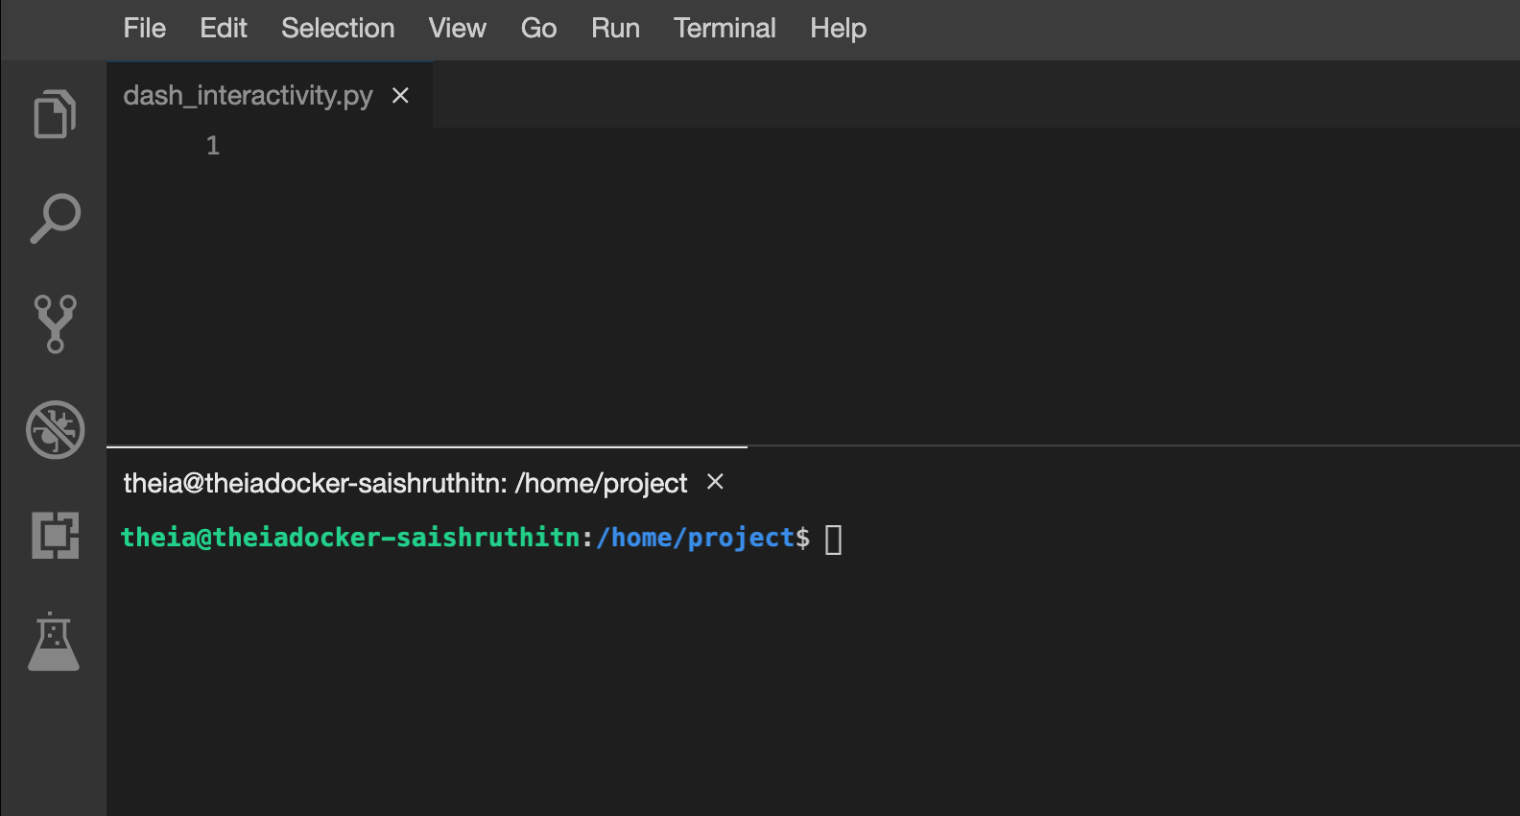

Install python packages required to run the application.

python -m pip install pandas dash


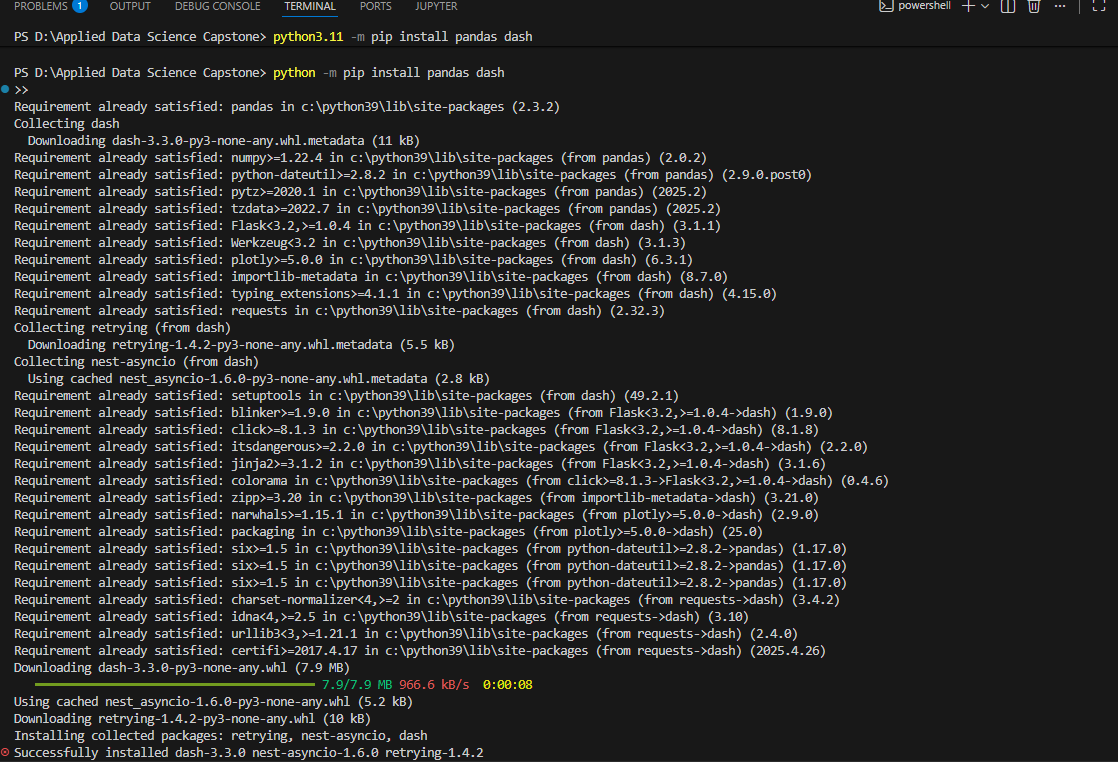

Download a skeleton dashboard application and dataset

First, let’s get the SpaceX Launch dataset for this lab:

Run the following wget command line in the terminal to download dataset as spacex_launch_dash.csv


wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"

Download a skeleton Dash app to be completed in this lab:

wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/t4-Vy4iOU19i8y6E3Px_ww/spacex-dash-app.py"

Test the skeleton app by running the following command in the terminal:

python 07-Intractive-Dashboard.py

Observe the port number (8050) shown in the terminal.

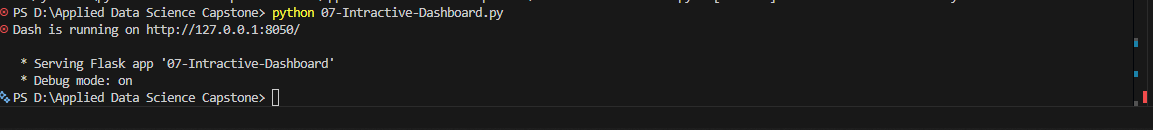

# TASK 1: Add a Launch Site Drop-down Input Component

Four different launch sites and like to first see which one has the largest success count. Then,  like to select one specific site and check its detailed success rate (class=0 vs. class=1).

As such, need a dropdown menu to let us select different launch sites.

Find and complete a commented dcc.Dropdown(id='site-dropdown',...) input with following attributes:
* id attribute with value site-dropdown
* options attribute is a list of dict-like option objects (with label and value attributes). Set
the label and value all to be the launch site names in the spacex_df and need to include the default All option. e.g.,

  options=[{'label': 'All Sites', 'value': 'ALL'},{'label': 'site1', 'value': 'site1'}, ...]

* value attribute with default dropdown value to be ALL meaning all sites are selected
* placeholder attribute to show a text description about this input area,
such as Select a Launch Site here
* searchable attribute to be True so we can enter keywords to search launch sites

Here is an example of dcc.Dropdown:

In [ ]:
  dcc.Dropdown(id='id',
                options=[
                    {'label': 'All Sites', 'value': 'ALL'},
                    {'label': 'site1', 'value': 'site1'},
                ],
                value='ALL',
                placeholder="place holder here",
                searchable=True
                ),

Completed dropdown menu should look like the following screenshot:

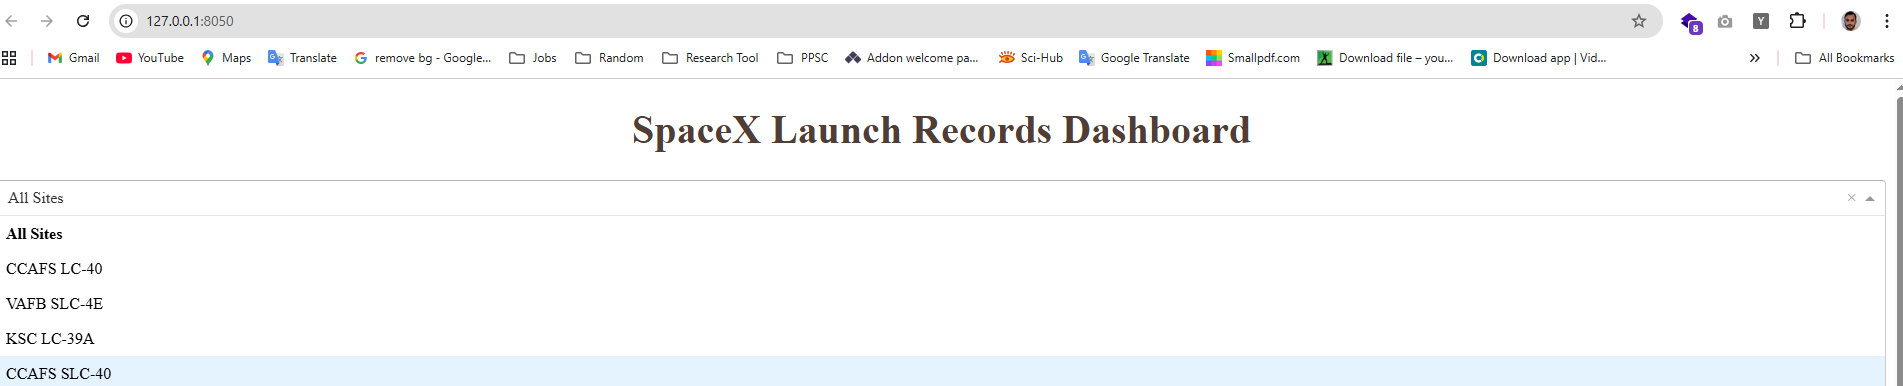

# TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown

The general idea of this callback function is to get the selected launch site from site-dropdown and render
a pie chart visualizing launch success counts.

Dash callback function is a type of Python function which will be automatically called by
Dash whenever receiving an input component updates, such as a click or dropdown selecting event.

Let’s add a callback function in spacex_dash_app.py including the following application logic:

* Input is set to be the site-dropdown dropdown, i.e., Input(component_id='site-dropdown', component_property='value')
* Output to be the graph with id success-pie-chart, i.e., Output(component_id='success-pie-chart', component_property='figure')
* A If-Else statement to check if ALL sites were selected or just a specific launch site was selected
#### If ALL sites are selected, we will use all rows in the dataframe spacex_df to render and return a pie chart graph to show the total success launches (i.e., the total count of class column)
#### If a specific launch site is selected, you need to filter the dataframe spacex_df first in order to include the only data for the selected site. Then, render and return a pie chart graph to show the success (class=1) count and failed (class=0) count for the selected site.

Here is an example of a callback function:

In [ ]:
# Function decorator to specify function input and output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(data, values='class', 
        names='pie chart names', 
        title='title')
        return fig
    else:
        # return the outcomes piechart for a selected site

The rendered pie chart look like the following screenshots:

Pie chart for all sites are selected

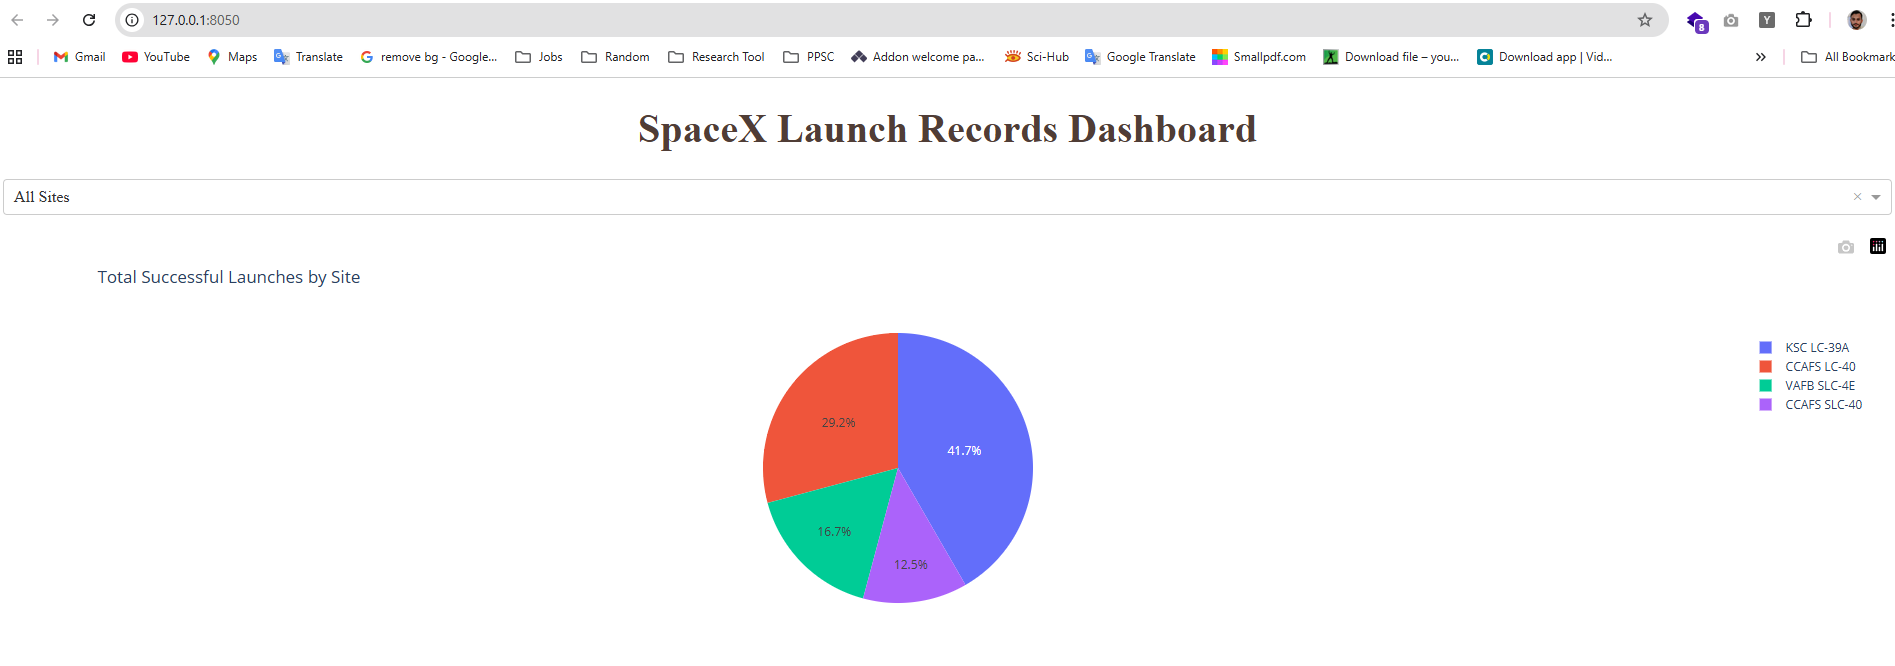

Pie chart for is selected
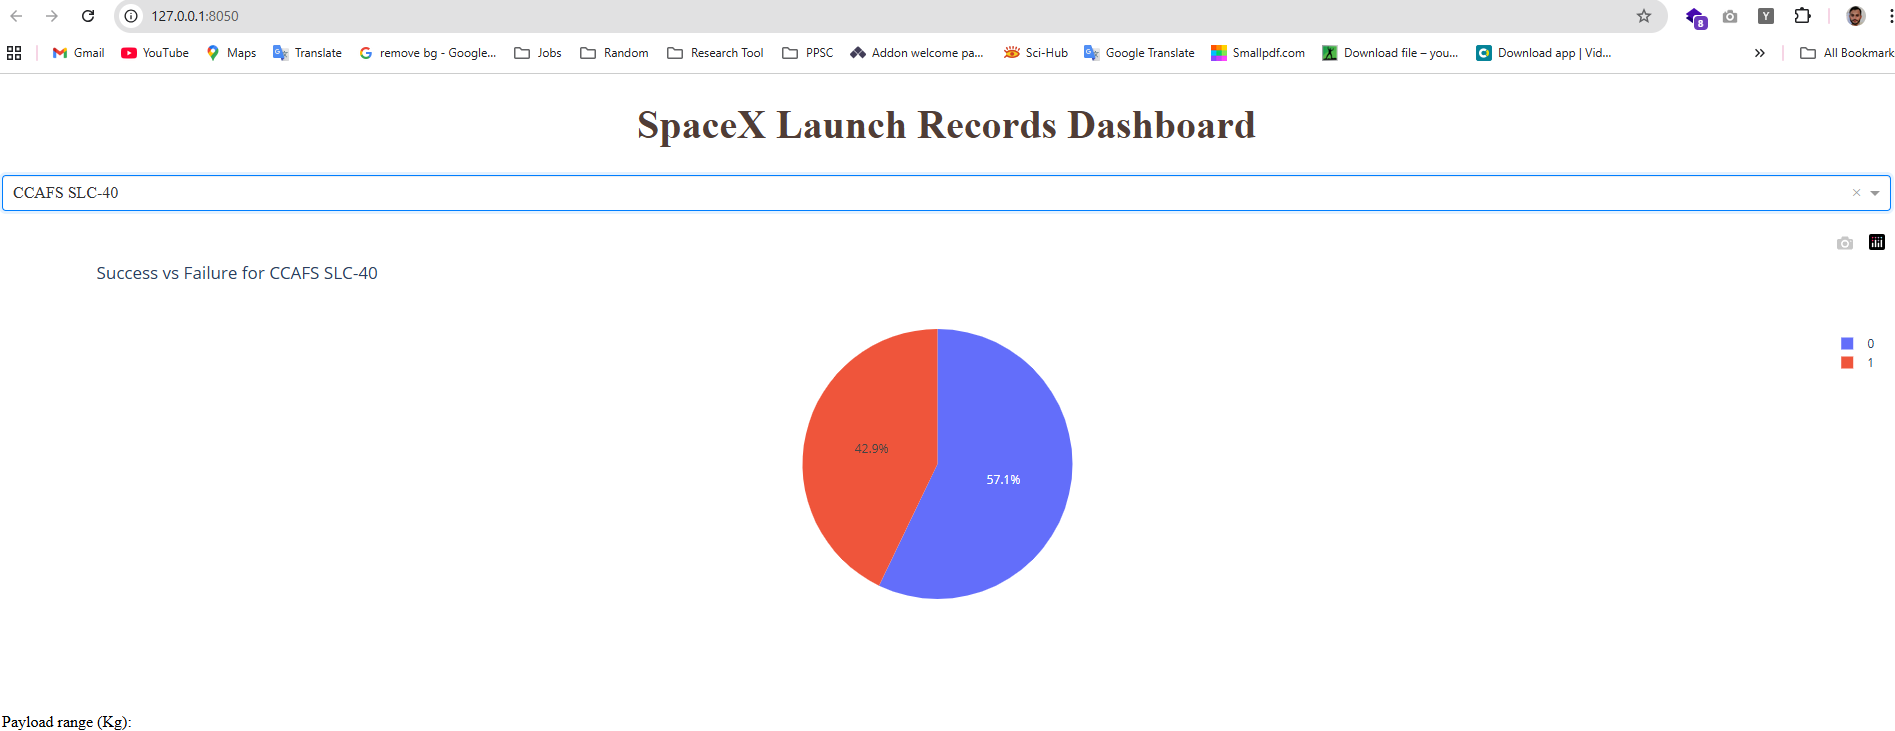

# TASK 3: Add a Range Slider to Select Payload

Next, to find if variable payload is correlated to mission outcome. From a dashboard point of view, to be able to easily select different payload range and identify some visual patterns.

Find and complete a commented dcc.RangeSlider(id='payload-slider',...) input with the following attribute:

* id to be payload-slider
* min indicating the slider starting point, we set its value to be 0 (Kg)
* max indicating the slider ending point to, we set its value to be 10000 (Kg)
* step indicating the slider interval on the slider, we set its value to be 1000 (Kg)
* value indicating the current selected range, we could set it to be min_payload and max_payload

Here is an example of RangeSlider:

In [ ]:
dcc.RangeSlider(id='id',
                min=0, max=10000, step=1000,
                marks={0: '0',
                       100: '100'},
                value=[min_value, max_value])

completed payload range slider shown in  the following screenshot:
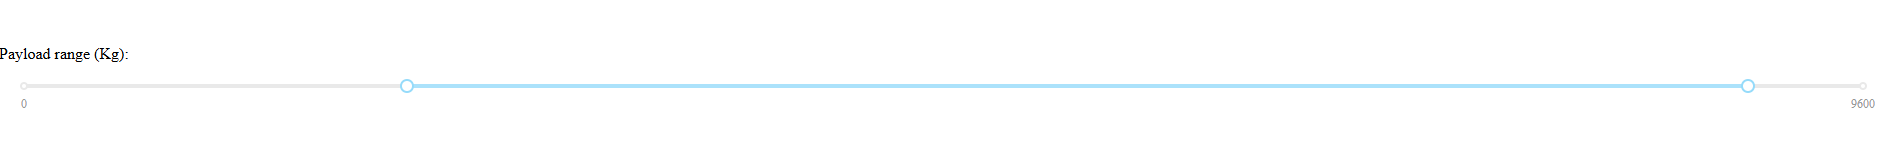


# TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot


Next,to plot a scatter plot with the x axis to be the payload and the y axis to be the launch outcome (i.e., class column).
As such, visually observe how payload may be correlated with mission outcomes for selected site(s).

In addition, to color-label the Booster version on each scatter point so that observe mission outcomes with different boosters.

Now, let’s add a call function including the following application logic:

* Input to be [Input(component_id='site-dropdown', component_property='value'), Input(component_id="payload-slider", component_property="value")]
Note that two input components, one to receive selected launch site and another to receive selected payload range
* Output to be Output(component_id='success-payload-scatter-chart', component_property='figure')
* A If-Else statement to check if ALL sites were selected or just a specific launch site was selected

    * If ALL sites are selected, render a scatter plot to display all values for variable Payload Mass (kg) and variable class.
In addition, the point color needs to be set to the booster version i.e., color="Booster Version Category"
    * If a specific launch site is selected, need to filter the spacex_df first, and render a scatter chart to show
values Payload Mass (kg) and class for the selected site, and color-label the point using Boosster Version Category likewise.

 rendered scatter point showing in  the following screenshot:
 

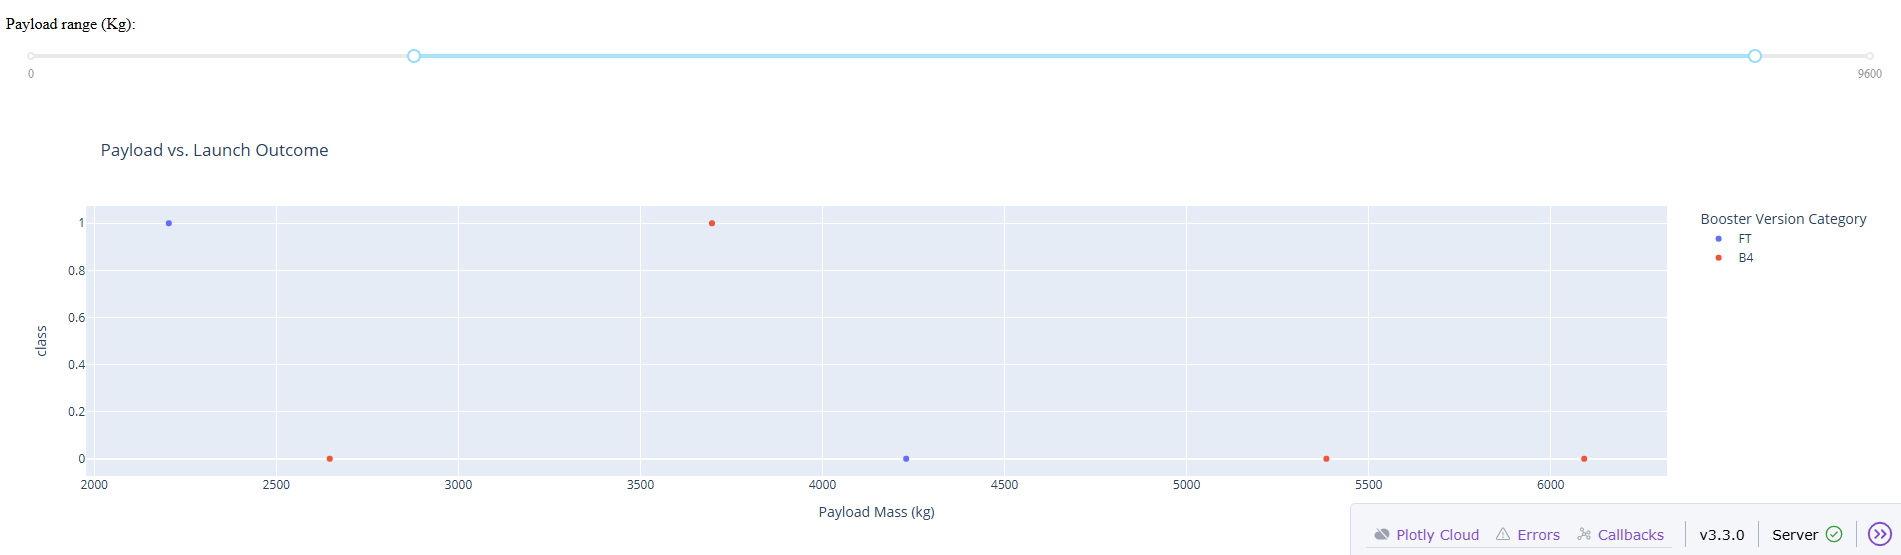

# Now its time to answer the following five questions:
1. Which site has the largest successful launches?
2. Which site has the highest launch success rate?
3. Which payload range(s) has the highest launch success rate?
4. Which payload range(s) has the lowest launch success rate?
5. Which F9 Booster version (v1.0, v1.1, FT, B4, B5, etc.) has the highest
launch success rate?

## 📊 Answers to Key EDA Questions
### 1️⃣ Which site has the largest number of successful launches?

KSC LC-39A has the largest number of successful launches, indicating it is the most frequently and reliably used launch site.

### 2️⃣ Which site has the highest launch success rate?

KSC LC-39A and VAFB SLC-4E exhibit the highest launch success rates, showing strong mission consistency despite different launch volumes.

### 3️⃣ Which payload range(s) has the highest launch success rate?

The payload range between 2,000 kg and 6,000 kg shows the highest launch success rate, where launches are consistently successful.

### 4️⃣ Which payload range(s) has the lowest launch success rate?

Payloads below 2,000 kg and above 8,000 kg have the lowest launch success rates, suggesting increased mission risk at extreme payload weights.

### 5️⃣ Which Falcon 9 booster version has the highest launch success rate?

The FT (Full Thrust) and B5 (Block 5) booster versions achieve the highest launch success rates, reflecting SpaceX’s technological improvements in later booster designs.

### ✅ Summary

Best performing launch site: KSC LC-39A

Most reliable payload range: 2,000–6,000 kg

Most successful booster versions: FT and B5

This analysis highlights how site selection, payload optimization, and advanced booster versions contribute to higher mission success.